In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = 16,7

- Completion Rate (CR) is the the percentage of orders that were completed successfuly. The taxi company wants to create a model to predict this mesurment in Kazan, a city in Russia. 
- Attached to this notebook is two files `train.csv` and `test.csv`
- A model to predict CR (`cr_guas`) has been trained on `train.csv` (`*-Model.ipynb`) and saved into `model.pkl`
- Your task is to analyze the model results and find out if there is any isusses with it.
- Please answer the questions below. 
- Provide proofs in the form statistics and plots.
- Write your own conclusion about the results as well as sugesstions for the solution

# Load Data

In [109]:
df_train = pd.read_csv('train.csv', encoding='utf-8')
df_test = pd.read_csv('test.csv', encoding='utf-8')

In [110]:
df_train.sample(5)

,sample_t,area,weekday,weekdaycat,hour,hourcat,cos604800,sin604800,cr_weight,cr_gaus,cr_mean
21784,1522326600,Kazan улица Галимджана Баруди,3.520833,NaN,12.500000,12,0.892698,0.450655,12.071254,0.896013,1.119287
96074,1522219800,Kazan улица Бутлерова,2.284722,6.0,6.833333,6,0.800881,-0.598824,9.527582,1.000000,1.101246
33346,1521448500,Kazan улица Мазита Гафури,0.357639,NaN,8.583333,8,-0.718040,-0.696002,0.256921,1.000000,0.986778
12622,1521395100,Kazan улица Патриса Лумумбы,6.739583,NaN,17.750000,17,-0.976966,-0.213396,14.474237,0.514971,0.113644
82361,1522319700,Kazan улица Оренбургский тракт,3.440972,NaN,10.583333,10,0.922682,0.385561,0.148747,1.000000,1.370260


# Load model

In [111]:
!pip install lightgbm

In [112]:
from lightgbm import LGBMRegressor, plot_importance
from sklearn.externals import joblib

In [113]:
lgb = joblib.load('model.pkl')

In [114]:
df_train['area'] = df_train['area'].astype('category')
df_train['weekdaycat'] = df_train['weekdaycat'].astype('category')
df_train['hourcat'] = df_train['hourcat'].astype('category')

features = ['area', 'weekday', 'weekdaycat', 'hour', 'hourcat', 'cos604800', 'sin604800', 'cr_mean']

df_test['area'] = df_test['area'].astype('category')
df_test['weekdaycat'] = df_test['weekdaycat'].astype('category')
df_test['hourcat'] = df_test['hourcat'].astype('category')

In [115]:
df_train['cr_pred'] = lgb.predict(df_train[features])
df_test['cr_pred'] = lgb.predict(df_test[features])

# Results

Please analyze and compare the MAE of the predictions
1. Is there any diffence between train\test? Why?
2. Is there any diffrence between areas? If so, why?
3. The product keep thinking there is a problem with our prediction... i cant find any problem. can you? find as many as you can! (don't forget plots)

# Plot the absolute error<br>

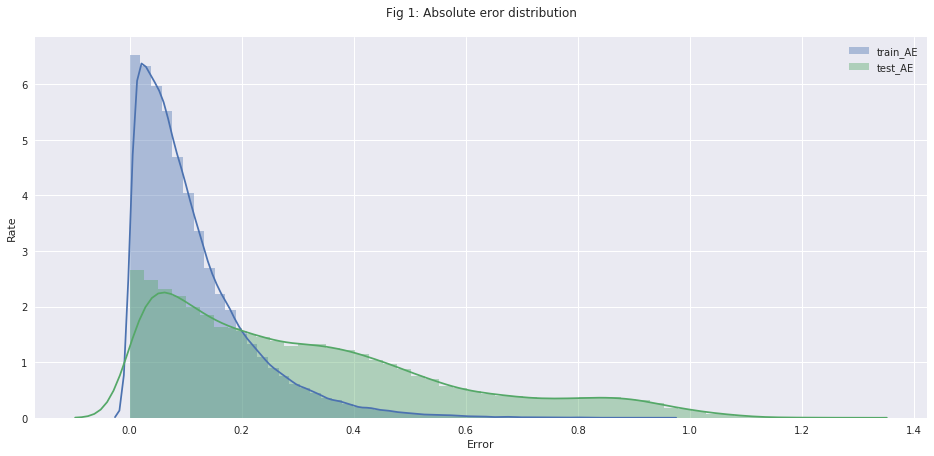

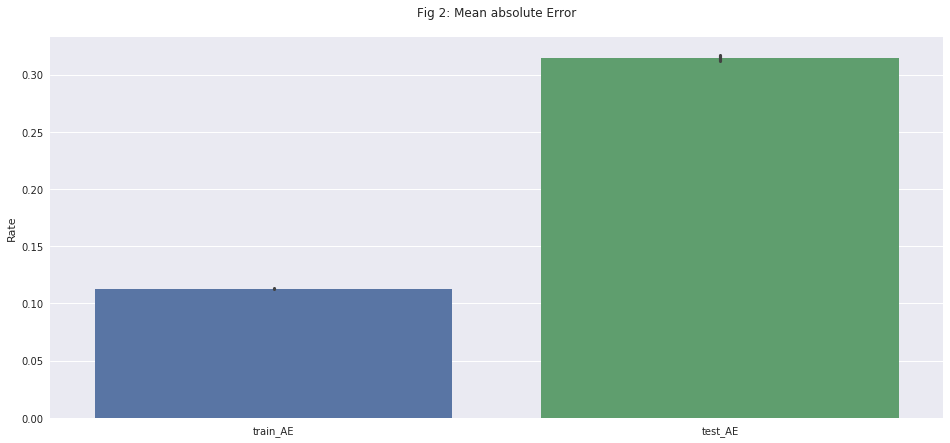

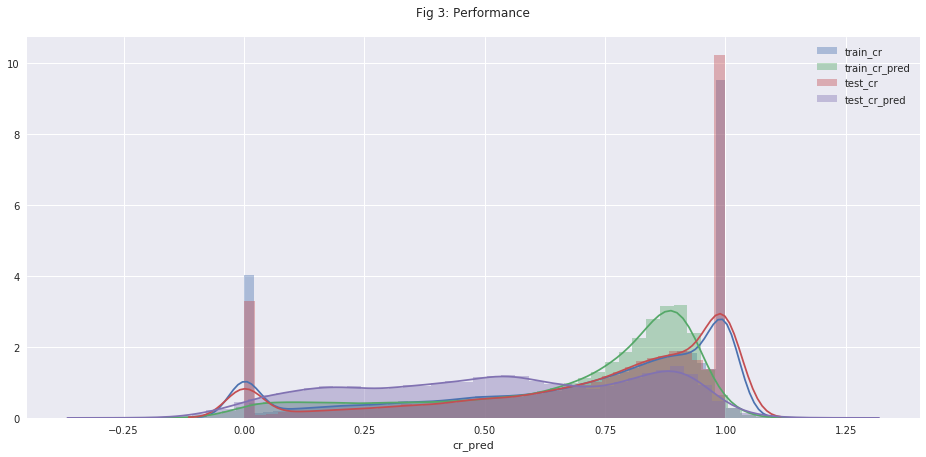

In [116]:
sns.distplot((df_train['cr_gaus'] - df_train['cr_pred']).abs())
sns.distplot((df_test['cr_gaus'] - df_test['cr_pred']).abs())

plt.xlabel('Error')
plt.ylabel('Rate')

plt.title('Fig 1: Absolute eror distribution\n')
plt.legend(['train_AE', 'test_AE'])

plt.show()




df_pred = pd.DataFrame()
df_pred['train_AE'] = (df_train['cr_gaus'] - df_train['cr_pred']).abs()
df_pred['test_AE'] = (df_test['cr_gaus'] - df_test['cr_pred']).abs()

ax = sns.barplot(data=df_pred,estimator=np.mean)
ax.set(ylabel='Rate',title='Fig 2: Mean absolute Error\n')

plt.show()




sns.distplot(df_train['cr_gaus'])
sns.distplot(df_train['cr_pred'])

sns.distplot(df_test['cr_gaus'])
sns.distplot(df_test['cr_pred'])

plt.title('Fig 3: Performance\n')
plt.legend(['train_cr', 'train_cr_pred', 'test_cr', 'test_cr_pred'])

plt.show()



<hr>
<font size=4> Analyzeing the results</font><br>

The result on the train set compre to the test:<br>
* The absolute errors (fig 1) are most found in the area that lower than 0.2 and the trend it's decreasing, on the test it spread all over the graph .<br>
<br>
* The mean absolute error (fig 2) on the train set is 0.11, and on the test is 0.31.<br>
<br> 

* The model performence (fig 3) on the train are predicting well the labels targets, on the test set the prediction are far from the labels.<br>
<br>

<b> Based on the results the model has an overfitting to the train set.</b><br> 



# Correlation

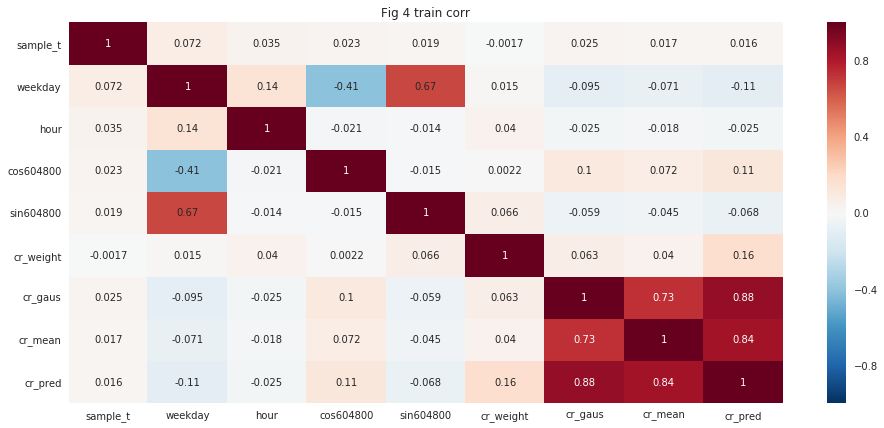

In [117]:
sns.heatmap(df_train.corr(),annot=True)
plt.title('Fig 4 train corr')
plt.show()

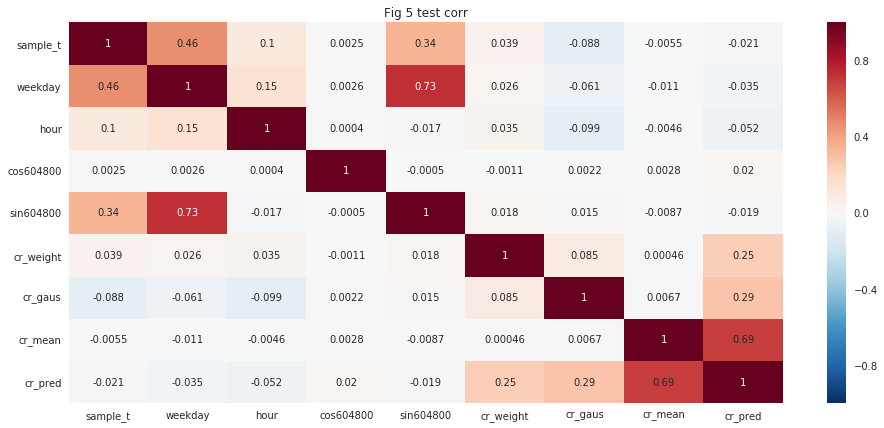

In [118]:
sns.heatmap(df_test.corr(),annot=True)
plt.title('Fig 5 test corr')
plt.show()

In figs 4 and 5 we can definitely see the main cause of the overfitting.<br>
<br>
The train labels (cr_gaus) has strong correlation to the cr_mean feature, in another hand the test has no correlation to the cr_mean.<br>


The model trained and learned that the cr_mean is very strong feature.<br>

The solution is to create new data set and split it to new train and test sets.

In [119]:
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('train.csv',encoding = "utf-8")
df_test = pd.read_csv('test.csv',encoding = "utf-8")

data = pd.concat([df_train,df_test])

df_train, df_test = train_test_split(data, test_size=0.3, random_state=1989)

In [120]:
# df_train.to_csv('new_train.csv',encoding='utf-8')
# df_test.to_csv('new_test.csv',encoding='utf-8')

In [121]:
df_train = pd.read_csv('new_train.csv',encoding = "utf-8")
df_test = pd.read_csv('new_test.csv',encoding = "utf-8")

# Right partition

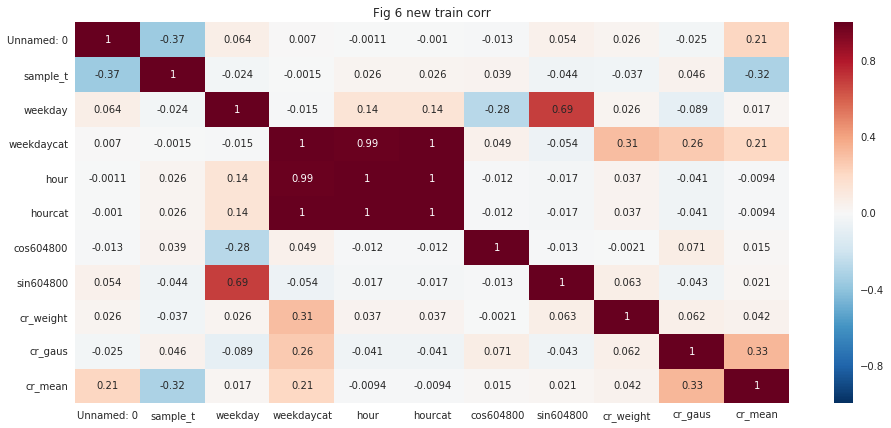

In [122]:
sns.heatmap(df_train.corr(),annot=True)
plt.title('Fig 6 new train corr')
plt.show()

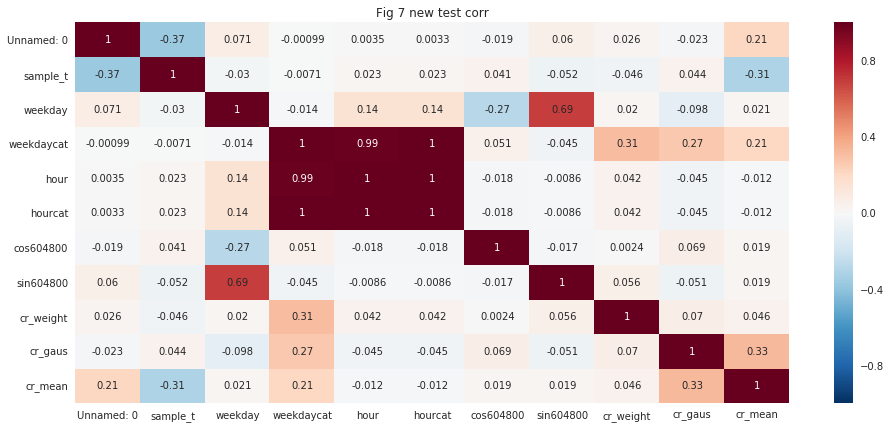

In [123]:
sns.heatmap(df_test.corr(),annot=True)
plt.title('Fig 7 new test corr')
plt.show()

In [124]:
df_train['area'] = df_train['area'].astype('category')
df_train['weekdaycat'] = df_train['weekdaycat'].astype('category')
df_train['hourcat'] = df_train['hourcat'].astype('category')

df_test['area'] = df_test['area'].astype(df_train['area'].dtype)
df_test['weekdaycat'] = df_test['weekdaycat'].astype(df_train['weekdaycat'].dtype)
df_test['hourcat'] = df_test['hourcat'].astype(df_train['hourcat'].dtype)

In [125]:
df_train_set, df_val_set = train_test_split(df_train, test_size=0.25, random_state=1989)

In [126]:
features = ['area', 'weekday', 'weekdaycat', 'hour', 'hourcat', 'cos604800', 'sin604800', 'cr_mean']

In [127]:
lgb = LGBMRegressor(n_estimators=10**4, max_depth=9, colsample_bytree=0.7, subsample=0.9, learning_rate=0.5)
lgb.fit(df_train_set[features], df_train_set['cr_gaus'], 
        eval_set=[(df_train_set[features], df_train_set['cr_gaus']), 
                  (df_val_set[features], df_val_set['cr_gaus'])], 
        verbose=100, early_stopping_rounds=10)

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's l2: 0.029611	valid_1's l2: 0.0360312
[200]	valid_0's l2: 0.0250716	valid_1's l2: 0.0348599
Early stopping, best iteration is:
[252]	valid_0's l2: 0.0234108	valid_1's l2: 0.0346398


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
       importance_type='split', learning_rate=0.5, max_depth=9,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=10000, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

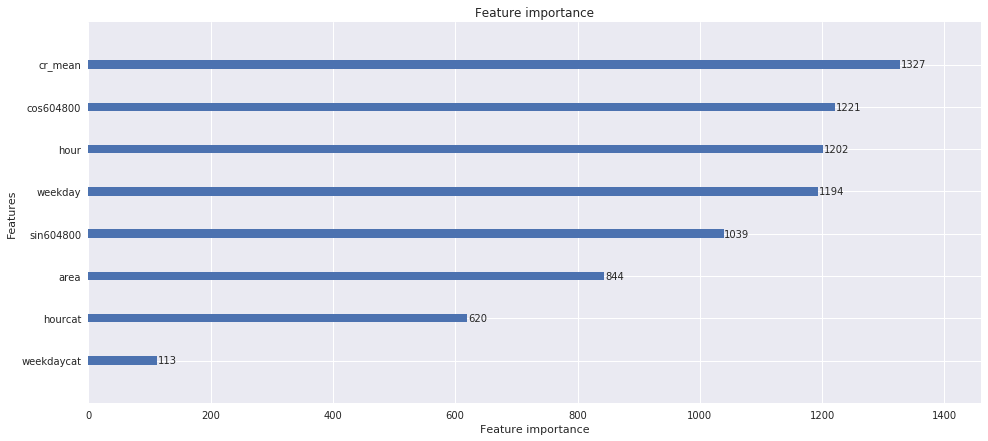

In [128]:
plot_importance(lgb)

In [129]:
df_train['cr_pred'] = lgb.predict(df_train[features])
df_test['cr_pred'] = lgb.predict(df_test[features])

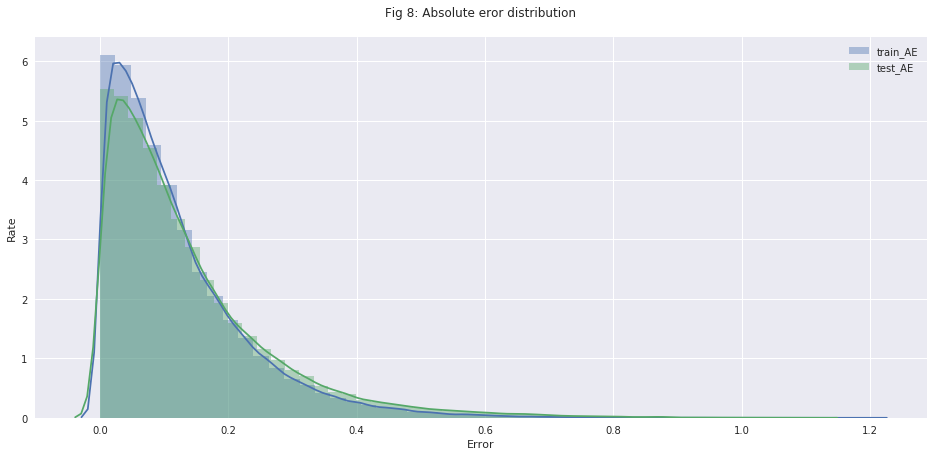

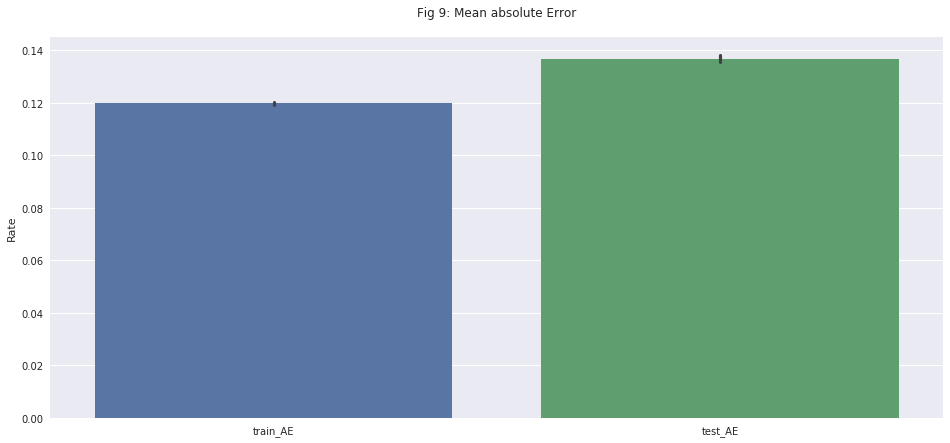

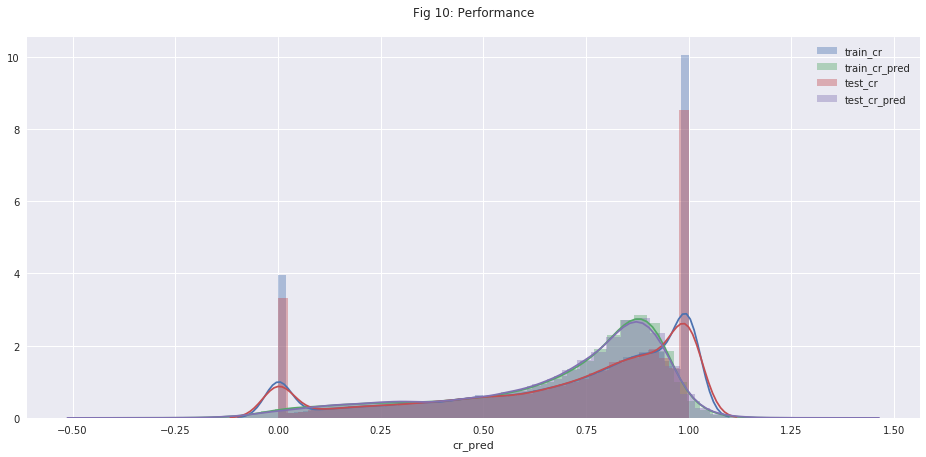

In [130]:
sns.distplot((df_train['cr_gaus'] - df_train['cr_pred']).abs())
sns.distplot((df_test['cr_gaus'] - df_test['cr_pred']).abs())

plt.xlabel('Error')
plt.ylabel('Rate')

plt.title('Fig 8: Absolute eror distribution\n')
plt.legend(['train_AE', 'test_AE'])

plt.show()




df_pred = pd.DataFrame()
df_pred['train_AE'] = (df_train['cr_gaus'] - df_train['cr_pred']).abs()
df_pred['test_AE'] = (df_test['cr_gaus'] - df_test['cr_pred']).abs()

ax = sns.barplot(data=df_pred,estimator=np.mean)
ax.set(ylabel='Rate',title='Fig 9: Mean absolute Error\n')

plt.show()




sns.distplot(df_train['cr_gaus'])
sns.distplot(df_train['cr_pred'])

sns.distplot(df_test['cr_gaus'])
sns.distplot(df_test['cr_pred'])

plt.title('Fig 10: Performance\n')
plt.legend(['train_cr', 'train_cr_pred', 'test_cr', 'test_cr_pred'])

plt.show()

After the new split we get a better resultes on the test set.<br>

But we still have isues:

* The model predictions are not in [0,1]. - <b>We will use the 'xentropy' loss function to get prediction in [0,1] range</b>
<br>

* The features are not normolized e.g 'cr_mean' need to be in [0,1] range...
<br>

* The 'cr_weight' feature is not in use we can gain some information from it. -  <b>We will use the 'cr_weight' fuature</b>
<br>

* ('weekday', 'weekdaycat'), ('hour', 'hourcat') features are duplicates forms of each other,<br>

  'weekday' is the number of the day in the week as float type, and the 'weekdaycat' is the int value for be assigned to catagory.
  
  As same is the 'hour' and 'hourcat' for hour in the day, taken from the sample_t (time stamp in sec).
  
  All the duplicates features can also cause to overfitting. -  <b>We will remove the 'weekday' and 'hour'.</b><br>
  
  
  
* Fill NaN values in the catagory features.  





In [131]:
df_train = pd.read_csv('new_train.csv',encoding = "utf-8")
df_test = pd.read_csv('new_test.csv',encoding = "utf-8")

In [132]:
df_train['area'] = df_train['area'].astype('category')
df_train['weekdaycat'] = df_train['weekday'].astype('int').astype('category')
df_train['hourcat'] = df_train['hourcat'].astype('category')


df_test['area'] = df_test['area'].astype('category')
df_test['weekdaycat'] = df_test['weekday'].astype('int').astype('category')
df_test['hourcat'] = df_test['hourcat'].astype('category')

In [133]:
df_test.cr_weight = (df_test.cr_weight - df_test.cr_weight.min())/(df_test.cr_weight.max()-df_test.cr_weight.min())
df_train.cr_weight = (df_train.cr_weight - df_train.cr_weight.min())/(df_train.cr_weight.max()-df_train.cr_weight.min())

df_test.cr_mean = (df_test.cr_mean - df_test.cr_mean.min())/(df_test.cr_mean.max()-df_test.cr_mean.min())
df_train.cr_mean = (df_train.cr_mean - df_train.cr_mean.min())/(df_train.cr_mean.max()-df_train.cr_mean.min())


In [134]:
features = ['area', 'weekdaycat', 'hourcat', 'cos604800', 'sin604800', 'cr_mean','cr_weight']

In [135]:
df_train_set, df_val_set = train_test_split(df_train, test_size=0.25, random_state=1989)

In [136]:
lgb = LGBMRegressor(objective= 'xentropy',n_estimators=10**4, max_depth=9, colsample_bytree=0.7, subsample=0.9, learning_rate=0.5)
lgb.fit(df_train_set[features], df_train_set['cr_gaus'], 
        eval_set=[(df_train_set[features], df_train_set['cr_gaus']), 
                  (df_val_set[features], df_val_set['cr_gaus'])], 
        verbose=100, early_stopping_rounds=10)

Training until validation scores don't improve for 10 rounds.
[100]	valid_0's xentropy: 0.434583	valid_1's xentropy: 0.457815
Early stopping, best iteration is:
[106]	valid_0's xentropy: 0.433489	valid_1's xentropy: 0.457419


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.7,
       importance_type='split', learning_rate=0.5, max_depth=9,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=10000, n_jobs=-1, num_leaves=31, objective='xentropy',
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=0.9, subsample_for_bin=200000, subsample_freq=0)

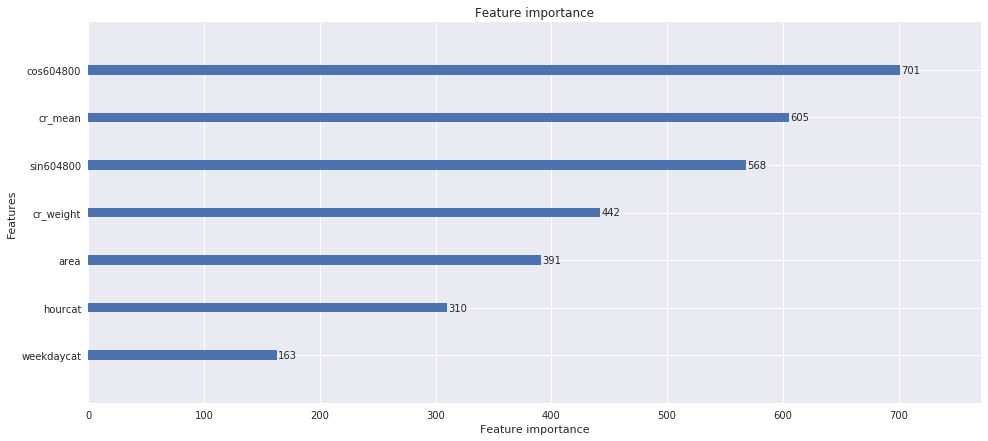

In [137]:
plot_importance(lgb)

In [138]:
df_train['cr_pred'] = lgb.predict(df_train[features])
df_test['cr_pred'] = lgb.predict(df_test[features])

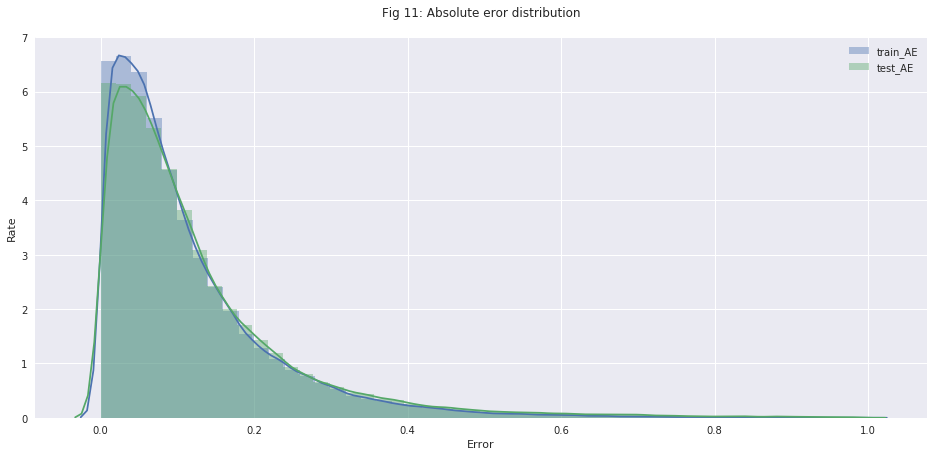

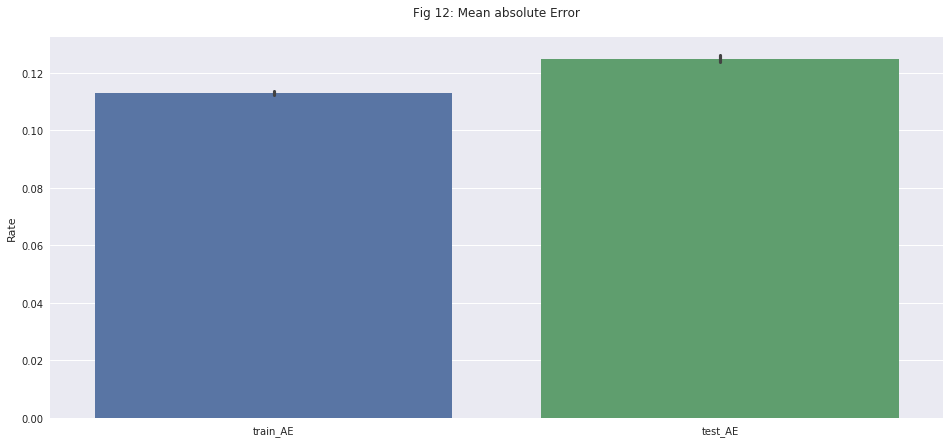

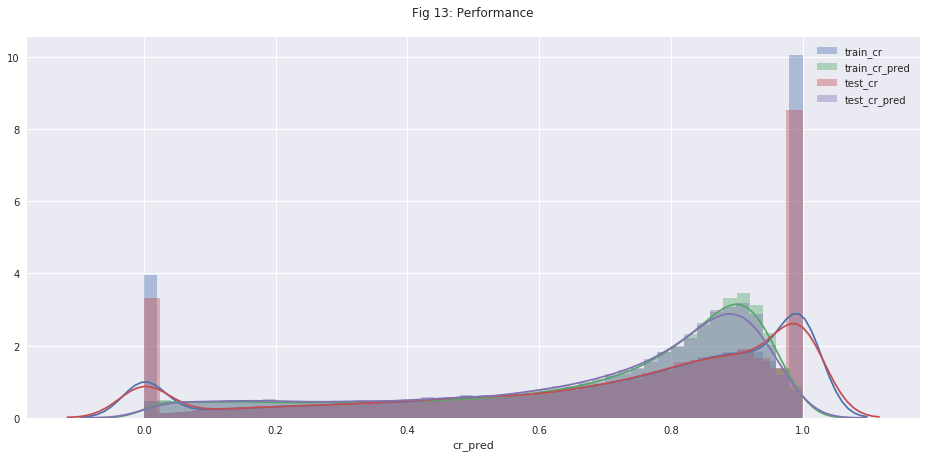

In [139]:
sns.distplot((df_train['cr_gaus'] - df_train['cr_pred']).abs())
sns.distplot((df_test['cr_gaus'] - df_test['cr_pred']).abs())

plt.xlabel('Error')
plt.ylabel('Rate')

plt.title('Fig 11: Absolute eror distribution\n')
plt.legend(['train_AE', 'test_AE'])

plt.show()




df_pred = pd.DataFrame()
df_pred['train_AE'] = (df_train['cr_gaus'] - df_train['cr_pred']).abs()
df_pred['test_AE'] = (df_test['cr_gaus'] - df_test['cr_pred']).abs()

ax = sns.barplot(data=df_pred,estimator=np.mean)
ax.set(ylabel='Rate',title='Fig 12: Mean absolute Error\n')

plt.show()




sns.distplot(df_train['cr_gaus'])
sns.distplot(df_train['cr_pred'])

sns.distplot(df_test['cr_gaus'])
sns.distplot(df_test['cr_pred'])

plt.title('Fig 13: Performance\n')
plt.legend(['train_cr', 'train_cr_pred', 'test_cr', 'test_cr_pred'])

plt.show()